### Student Information
Name: 黃羿文

Student ID: R13227116 

GitHub ID: hachiyeee

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [1]:
### Begin Assignment Here
from datasets import load_dataset

ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

README.md:   0%|          | 0.00/978 [00:00<?, ?B/s]

(…)nt_Analysis_of_YouTube_Comments_Data.csv:   0%|          | 0.00/219k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1500 [00:00<?, ? examples/s]

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
train_data = ds['train']

train_df = pd.DataFrame(train_data)

train_df.head()

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...


## Visualizations

/var/folders/v6/b2z54ks165bb_ms8qd2z66pm0000gn/T/ipykernel_92342/3077282124.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')


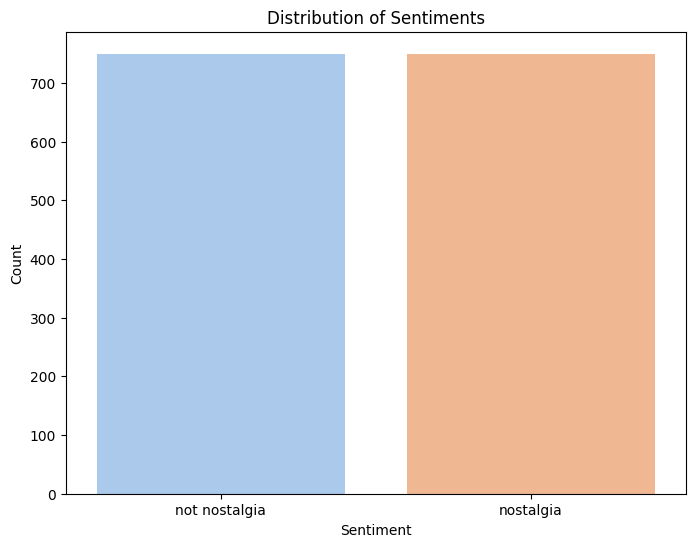

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the sentiment labels
sentiment_counts = train_df['sentiment'].value_counts()

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

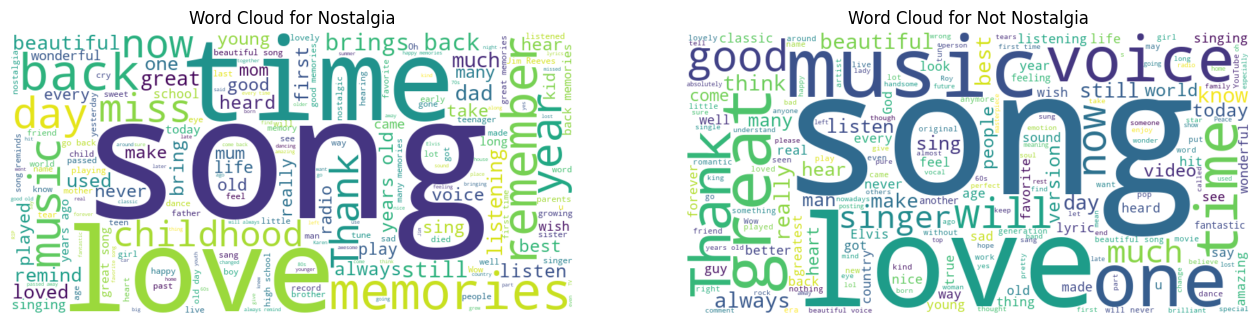

In [13]:
from wordcloud import WordCloud

# Generate word clouds
nostalgia_comments = " ".join(train_df.query("sentiment == 'nostalgia'")['comment'])
not_nostalgia_comments = " ".join(train_df.query("sentiment == 'not nostalgia'")['comment'])
 
wordcloud_nostalgia = WordCloud(width=800, height=400, background_color='white').generate(nostalgia_comments)
wordcloud_not_nostalgia = WordCloud(width=800, height=400, background_color='white').generate(not_nostalgia_comments)

# Plot
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_nostalgia, interpolation='bilinear')
plt.title('Word Cloud for Nostalgia')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_not_nostalgia, interpolation='bilinear')
plt.title('Word Cloud for Not Nostalgia')
plt.axis('off')

plt.show()


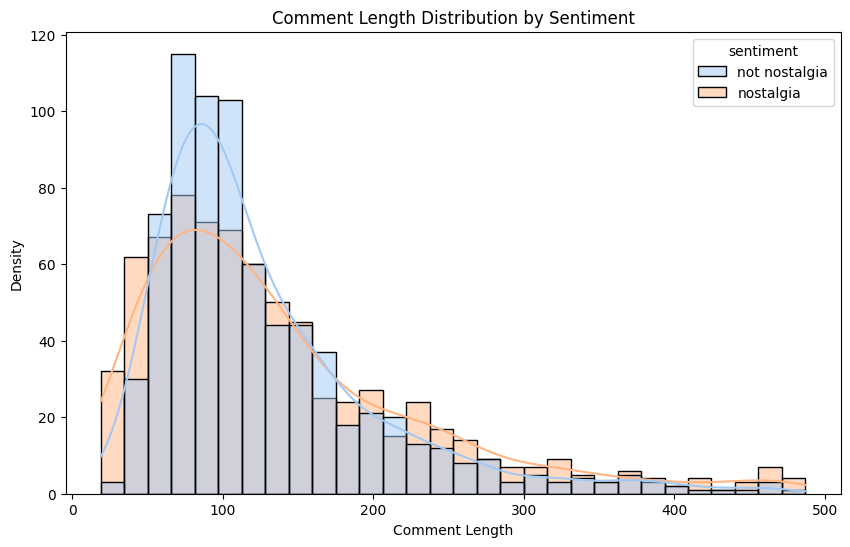

In [14]:
# Calculate comment lengths
train_df['comment_length'] = train_df['comment'].apply(len)

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='comment_length', hue='sentiment', bins=30, kde=True, palette='pastel')
plt.title('Comment Length Distribution by Sentiment')
plt.xlabel('Comment Length')
plt.ylabel('Density')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yvonneh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/v6/b2z54ks165bb_ms8qd2z66pm0000gn/T/ipykernel_92342/3223925002.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[1] for x in nostalgia_words], y=[x[0] for x in nostalgia_words], ax=axs[0], palette='pastel')
/var/folders/v6/b2z54ks165bb_ms8qd2z66pm0000gn/T/ipykernel_92342/3223925002.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[1] for x in not_nostalgia_words], y=[x[0] for x in not_nostalgia_words], ax=axs[1], palette='pastel')


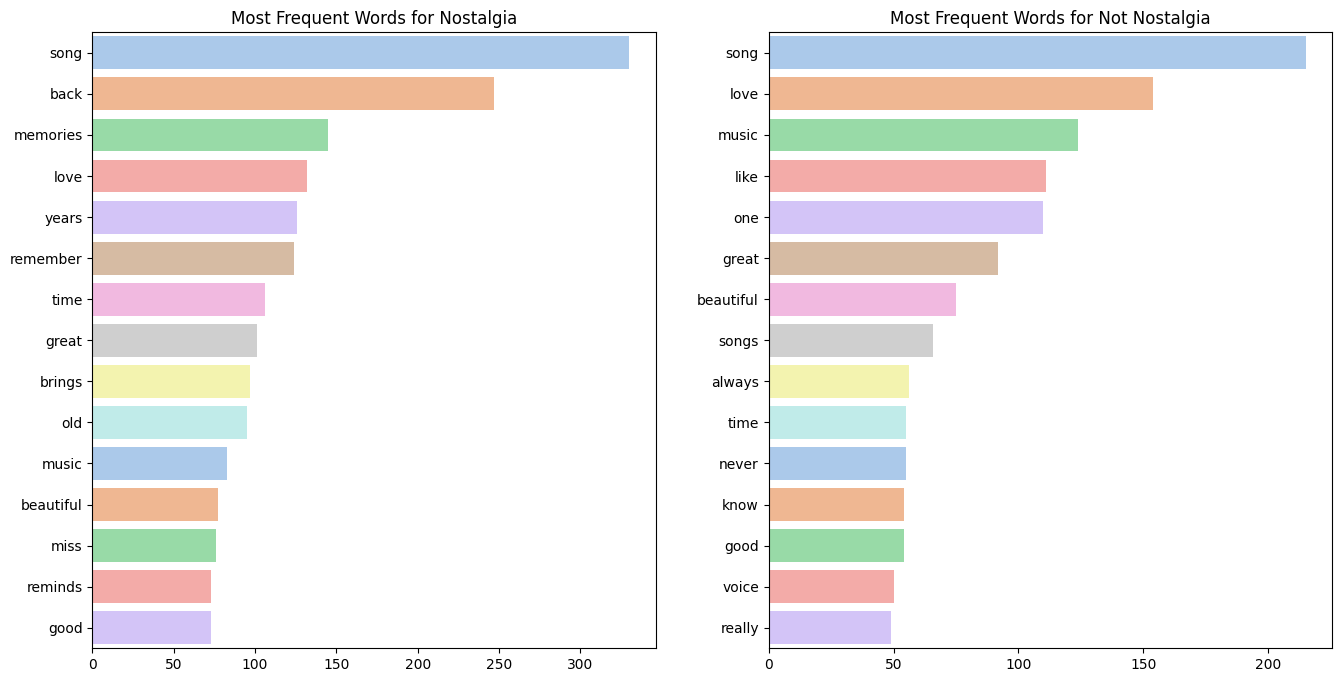

In [15]:
from collections import Counter
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Tokenize and count words
def most_common_words(comments, n=15):
    words = [word.lower() for comment in comments for word in comment.split() if word.lower() not in stop_words]
    return Counter(words).most_common(n)

nostalgia_words = most_common_words(train_df.query("sentiment == 'nostalgia'")['comment'])
not_nostalgia_words = most_common_words(train_df.query("sentiment == 'not nostalgia'")['comment'])

# Create bar plots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
sns.barplot(x=[x[1] for x in nostalgia_words], y=[x[0] for x in nostalgia_words], ax=axs[0], palette='pastel')
axs[0].set_title('Most Frequent Words for Nostalgia')
sns.barplot(x=[x[1] for x in not_nostalgia_words], y=[x[0] for x in not_nostalgia_words], ax=axs[1], palette='pastel')
axs[1].set_title('Most Frequent Words for Not Nostalgia')

plt.show()


## TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

comments = train_df['comment'] 

vectorizer = TfidfVectorizer(
    max_features=5000,  # Use the top 5000 words based on TF-IDF scores 
    stop_words='english',  
    ngram_range=(1, 1)  
)

tfidf_matrix = vectorizer.fit_transform(comments)

In [17]:
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),  
    columns=vectorizer.get_feature_names_out()  
)

print(tfidf_df.head())

    00  000  045   07   10  100  10m   11  11th   12  ...  youngster  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...        0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...        0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...        0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...        0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...        0.0   

   youngsters  youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0         0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1         0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
2         0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
3         0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
4         0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  

[5 rows x 3485 columns]


In [20]:
mean_tfidf_scores = tfidf_df.mean(axis=0).sort_values(ascending=False)
mean_tfidf_scores.index[:20]

Index(['song', 'love', 'memories', 'music', 'time', 'great', 'beautiful',
       'songs', 'years', 'like', 'old', 'good', 'brings', 'just', 'voice',
       'remember', 'days', 'childhood', 'best', 'miss'],
      dtype='object')

## Naive Bayes Classifier

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, accuracy_score

### Word frequency features

In [24]:
# Extract features and labels
X = train_df['comment']  
y = train_df['sentiment']  

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Create word frequency features
count_vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Train MultinomialNB
mnb_count = MultinomialNB()
mnb_count.fit(X_train_count, y_train)

# Predict and evaluate
y_pred_count = mnb_count.predict(X_test_count)
print("MultinomialNB with Word Frequency Features")
print(classification_report(y_test, y_pred_count))
print("Accuracy:", accuracy_score(y_test, y_pred_count))


MultinomialNB with Word Frequency Features
               precision    recall  f1-score   support

    nostalgia       0.74      0.97      0.84       152
not nostalgia       0.95      0.66      0.78       148

     accuracy                           0.81       300
    macro avg       0.85      0.81      0.81       300
 weighted avg       0.85      0.81      0.81       300

Accuracy: 0.8133333333333334


### TF-IDF features

In [26]:
# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train ComplementNB
cnb_tfidf = ComplementNB()
cnb_tfidf.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_tfidf = cnb_tfidf.predict(X_test_tfidf)
print("ComplementNB with TF-IDF Features")
print(classification_report(y_test, y_pred_tfidf))
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))

ComplementNB with TF-IDF Features
               precision    recall  f1-score   support

    nostalgia       0.73      0.97      0.83       152
not nostalgia       0.95      0.64      0.76       148

     accuracy                           0.80       300
    macro avg       0.84      0.80      0.80       300
 weighted avg       0.84      0.80      0.80       300

Accuracy: 0.8033333333333333


The accuracy with Word Frequency features is better than that with TFIDF features. 

This is possibly because the TFIDF features loses information with common word deletion, and the influence of certain key words such as "nostalgia" might be downgraded. Also, the two categories have similar texts, so TFIDF might not be able to distinguish the topics as well. 